### Data Preparation

In [1]:
#pip install missingno

In [2]:
import missingno as msno
from sklearn import metrics
import numpy as np
import pandas as pd
import math
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data = pd.read_csv('train.csv', sep=';',decimal=',')

In [4]:
data.shape

(514009, 27)

In [5]:
data

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,3532353737373832,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
514005,3335363533383731,313339,31,0.00,0.00,0.00,0.00,0.12,0.00,0.12,...,1,0,1,0,0,0,1,0,0,0
514006,3535343831313531,343637,31,0.00,0.00,0.00,0.00,1.27,0.00,1.27,...,1,0,1,0,0,0,1,0,0,0
514007,3439393930353235,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

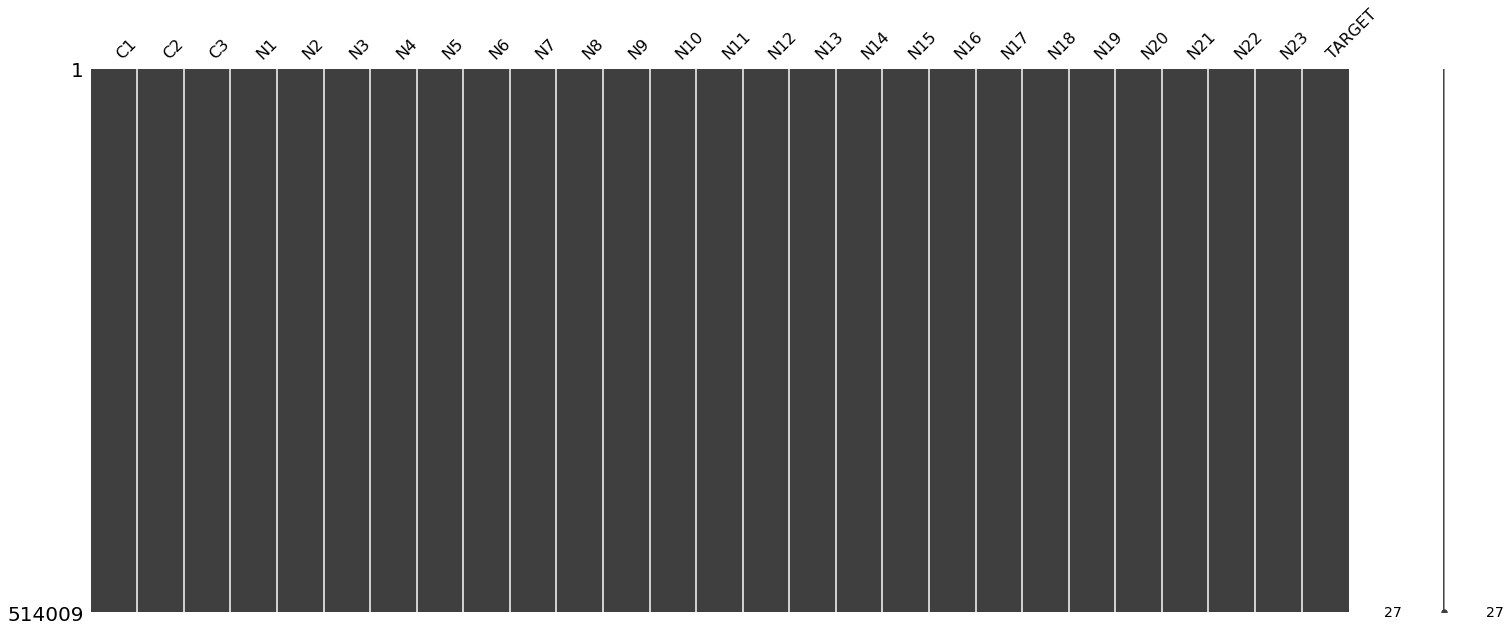

In [7]:
msno.matrix(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  int64  
 1   C2      514009 non-null  int64  
 2   C3      514009 non-null  int64  
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

In [9]:
print('Number of dublicates in test set:', len(data)-len(data.drop_duplicates()))

Number of dublicates in test set: 0


In [10]:
print('Target:\n', data.TARGET.value_counts())

Target:
 0    488665
1     25344
Name: TARGET, dtype: int64


So, our dataset is imbalanced

In [11]:
data['C1'].nunique()
#So, by this we can say that all values in C1 are unique, which means they are not needed for the prediction

514009

In [12]:
data = data.drop(["C1"], axis=1)

In [13]:
print(data['C2'].nunique())
print(data['C3'].nunique())
#columns C2 and C3 are classes

64
3


In [14]:
print('N12:\n', data.N12.value_counts())
print('N13:\n', data.N13.value_counts())
print('N22:\n', data.N13.value_counts())
print('N23:\n', data.N13.value_counts())

N12:
 0.00     508142
0.33        284
0.67        158
2.00        142
1.00        108
          ...  
25.20         1
45.13         1
66.17         1
33.40         1
13.38         1
Name: N12, Length: 1104, dtype: int64
N13:
 0.00      507535
0.03        2790
0.07         338
0.02         195
0.05         104
           ...  
11.28          1
15.72          1
13.03          1
19.15          1
102.82         1
Name: N13, Length: 672, dtype: int64
N22:
 0.00      507535
0.03        2790
0.07         338
0.02         195
0.05         104
           ...  
11.28          1
15.72          1
13.03          1
19.15          1
102.82         1
Name: N13, Length: 672, dtype: int64
N23:
 0.00      507535
0.03        2790
0.07         338
0.02         195
0.05         104
           ...  
11.28          1
15.72          1
13.03          1
19.15          1
102.82         1
Name: N13, Length: 672, dtype: int64


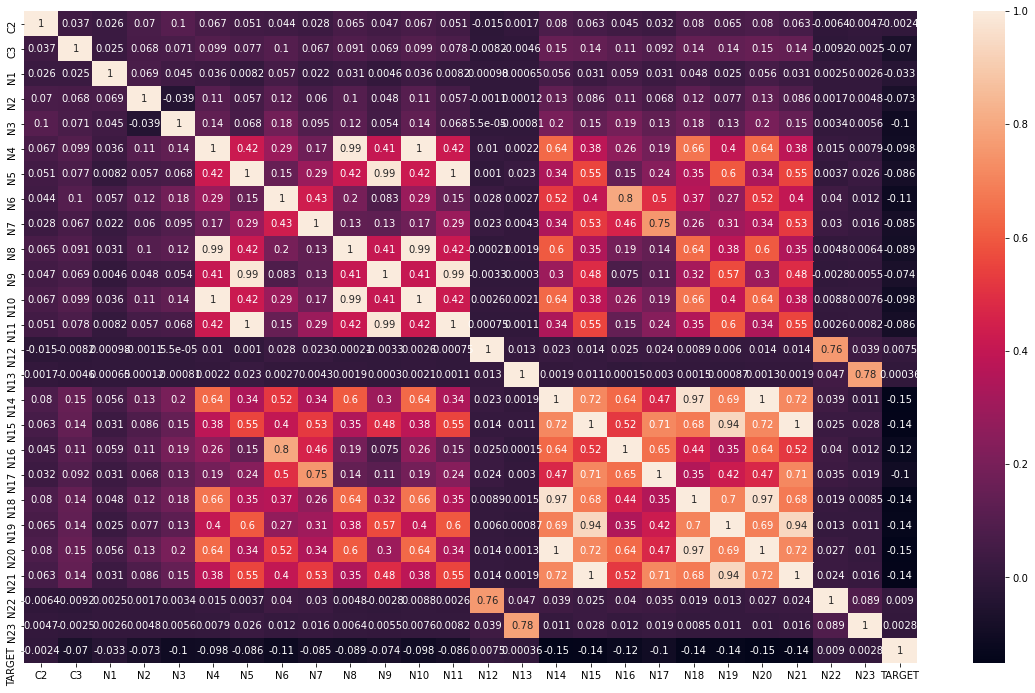

In [15]:
#checking correlation
plt.figure(figsize=(20,12))
corrMatrix=data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
#as you can see, some cols have extremely high correlation, so
#let's try some feature selection 
#that function will return features that are highly and low correlated

def correlate(data, threshold):
    col_corr = set()  # setting all the names of columns
    corrMatrix = data.corr()
    
    for i in range(len(corrMatrix.columns)):
        for j in range(i):
            if abs(corrMatrix.iloc[i, j]) > threshold: 
                col = corrMatrix.columns[i]  #getting the name of column, where we have high and low corr
                col_corr.add(col)
                
    return col_corr

features_to_drop = correlate(data, 0.9) #by this we will pull out features with 0.9+ and -0.9- correlations
print('Number of features: ',len(set(features_to_drop)))
print('Features: ', features_to_drop)

Number of features:  8
Features:  {'N9', 'N21', 'N18', 'N10', 'N8', 'N20', 'N11', 'N19'}


In [17]:
#let's drop it and see if the prediction becomes better
data = data.drop(features_to_drop,axis=1)

In [18]:
data.head()

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N12,N13,N14,N15,N16,N17,N22,N23,TARGET
0,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,0.0,0.0,36,7,0,0,0,0,0
1,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,0.0,0.0,57,18,5,6,0,0,0
2,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,0.0,0.0,64,24,18,6,0,0,0
3,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,0.0,0.0,148,57,4,1,0,0,0
4,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,0.0,0.0,86,28,17,5,0,0,0


In [19]:
data.shape

(514009, 18)

In [20]:
#that function will scale our dataset
def min_max_scaling(data):
    df_norm = data.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm

data1 = data.iloc[:, 2:17]
data2 = data.iloc[:, [0,1,17]]
df_normalized = min_max_scaling(data1)
df_normalized = df_normalized.join(data2)
df_normalized

,N1,N2,N3,N4,N5,N6,N7,N12,N13,N14,N15,N16,N17,N22,N23,C2,C3,TARGET
0,0.002994,0.032742,0.000902,0.002700,0.001849,0.000000,0.000000,0.0,0.0,0.026746,0.005564,0.000000,0.000000,0.0,0.0,323531,33,0
1,0.000052,0.013146,0.000458,0.023025,0.005581,0.013013,0.013853,0.0,0.0,0.042348,0.014308,0.011628,0.012024,0.0,0.0,343835,31,0
2,0.000000,0.000330,0.003793,0.005233,0.014871,0.021114,0.004901,0.0,0.0,0.047548,0.019078,0.041860,0.012024,0.0,0.0,323531,33,0
3,0.004200,0.005461,0.007486,0.013881,0.009494,0.014144,0.000200,0.0,0.0,0.109955,0.045310,0.009302,0.002004,0.0,0.0,343433,31,0
4,0.000000,0.000395,0.017359,0.042400,0.014016,0.037838,0.004281,0.0,0.0,0.063893,0.022258,0.039535,0.010020,0.0,0.0,343835,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,313339,31,1
514005,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000120,0.0,0.0,0.000000,0.000795,0.000000,0.002004,0.0,0.0,313339,31,0
514006,0.000000,0.000000,0.000000,0.000000,0.000245,0.000000,0.001270,0.0,0.0,0.000000,0.000795,0.000000,0.002004,0.0,0.0,343637,31,0
514007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,313339,31,1


In [21]:
x, y = df_normalized.drop('TARGET', axis = 1), df_normalized['TARGET']
y

0         0
1         0
2         0
3         0
4         0
         ..
514004    1
514005    0
514006    0
514007    1
514008    0
Name: TARGET, Length: 514009, dtype: int64

In [22]:
#splitting x and y into train and test with ration 70/30
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = 0.3)

#### Bagging Classifier 

In [23]:
#first of all, let's try bagging
model = BaggingClassifier(n_estimators=20)
# fit the model on the whole dataset
model.fit(X_train,y_train)
# make a single prediction
y_pred1=model.predict(X_train)
y_pred=model.predict(X_test)
acc1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy of test:",acc1)

Accuracy of train: 0.9802671439609123
Accuracy of test: 0.9506754083902389


In [24]:
print("Micro:") #it calculates metrics by counting the total true positives, false negatives and false positives.
print("Precision: ", precision_score(y_test, y_pred, average='micro'))
print("Recall: ", recall_score(y_test, y_pred, average='micro'))
print("F1 score: ", f1_score(y_test, y_pred, average='micro'))

print("Weighted:") #alculates metrics for each label and finds their average weighted by support 
prec1=precision_score(y_test, y_pred, average='weighted')
rec1=recall_score(y_test, y_pred, average='weighted')
f11s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec1)
print("Recall: ", rec1)
print("F1 score: ", f11s)

Micro:
Precision:  0.9506754083902389
Recall:  0.9506754083902389
F1 score:  0.9506754083902389
Weighted:
Precision:  0.9405523118189232
Recall:  0.9506754083902389
F1 score:  0.943926772926808


#### Random Forest

In [25]:
#We want to show feature importance score by using RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_train)
y_pred=clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy of test:",acc2)

Accuracy of train: 0.9826990100220675
Accuracy of test: 0.9513628139530359


In [26]:
print("Micro:")
print("Precision: ", precision_score(y_test, y_pred, average='micro'))
print("Recall: ", recall_score(y_test, y_pred, average='micro'))
print("F1 score: ", f1_score(y_test, y_pred, average='micro'))

print("Weighted:")
prec2=precision_score(y_test, y_pred, average='weighted')
rec2=recall_score(y_test, y_pred, average='weighted')
f12s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec2)
print("Recall: ", rec2)
print("F1 score: ", f12s)

Micro:
Precision:  0.9513628139530359
Recall:  0.9513628139530359
F1 score:  0.9513628139530359
Weighted:
Precision:  0.9411075368354468
Recall:  0.9513628139530359
F1 score:  0.9443357384011097


In [27]:
#using function feature_importances_ to check importances of cols
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

N5     0.249315
N15    0.110741
N4     0.091175
C2     0.089180
N7     0.084984
N2     0.076111
N3     0.058238
N14    0.057713
N6     0.049123
N1     0.044789
N17    0.036820
N16    0.027873
C3     0.012156
N12    0.003875
N13    0.003276
N22    0.002548
N23    0.002081
dtype: float64

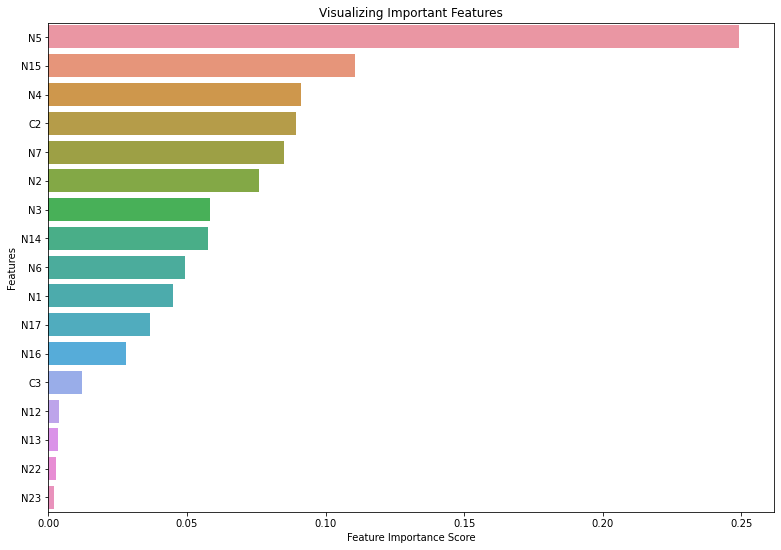

In [28]:
#plotting importancies
plt.figure(figsize=(13,9))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [29]:
#we decided to drop 4 last columns, because they are not 'important' features
dataframe = df_normalized.drop(["N23",'N22','N13','N12'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('TARGET', axis = 1), 
                                                    dataframe['TARGET'], 
                                                    test_size = 0.3)

In [31]:
#running this model again
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_train)
y_pred=clf.predict(X_test)
acc3 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy of test:",acc3)

Accuracy of train: 0.9823932897172365
Accuracy of test: 0.9514146936181527


In [32]:
print("Micro:")
print("Precision: ", precision_score(y_test, y_pred, average='micro'))
print("Recall: ", recall_score(y_test, y_pred, average='micro'))
print("F1 score: ", f1_score(y_test, y_pred, average='micro'))

print("Weighted:")
prec3=precision_score(y_test, y_pred, average='weighted')
rec3=recall_score(y_test, y_pred, average='weighted')
f13s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec3)
print("Recall: ", rec3)
print("F1 score: ", f13s)

Micro:
Precision:  0.9514146936181527
Recall:  0.9514146936181527
F1 score:  0.9514146936181527
Weighted:
Precision:  0.9426238003994395
Recall:  0.9514146936181527
F1 score:  0.9457289013772238


#### Hyperparameters

In [33]:
#parameters to check
param = {"max_depth": [2, None],
              "max_features": [int(x) for x in np.linspace(start = 2, stop = 9, num = 5)],
              "min_samples_split": [int(x) for x in np.linspace(start = 2, stop = 9, num = 5)],
              "min_samples_leaf": [int(x) for x in np.linspace(start = 2, stop = 9, num = 5)],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [34]:
[int(x) for x in np.linspace(start = 2, stop = 9, num = 5)]

[2, 3, 5, 7, 9]

In [35]:
#we chose RandomizedSearchCV to tune random forest
rf_random = RandomizedSearchCV(clf, param, n_iter=5, cv=3, random_state=1)
rf_random.fit(X_train, y_train)
rf_random.best_params_ #it will show the best parameters

{'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [48]:
clf=RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=9,
                          max_depth = None, criterion = 'gini') #bootstrap is true by default
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_train)
y_pred=clf.predict(X_test)
acc6 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy of test:",acc6)

Accuracy of train: 0.9550174260573754
Accuracy of test: 0.9533666660181709


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO     145095       5657
 Predicted YES      1534       1917
              precision    recall  f1-score   support

          No       0.96      0.99      0.98    146629
         Yes       0.56      0.25      0.35      7574

    accuracy                           0.95    154203
   macro avg       0.76      0.62      0.66    154203
weighted avg       0.94      0.95      0.94    154203



In [50]:
print("Micro:")
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

print("Weighted:")
prec6=precision_score(y_test, y_pred, average='weighted')
rec6=recall_score(y_test, y_pred, average='weighted')
f16s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec6)
print("Recall: ", rec6)
print("F1 score: ", f16s)

Micro:
Precision:  0.7589829775098029
Recall:  0.6213204710735932
F1 score:  0.6617870005144915
Weighted:
Precision:  0.9424849483418483
Recall:  0.9533666660181709
F1 score:  0.944970243656693


#### Random Forest with SMOTE

In [38]:
#let's try to oversample train data
#resampling the minority class
sm = SMOTE(sampling_strategy=0.5, random_state=7)
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)

In [40]:
clf=RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=9,
                          max_depth = None, criterion = 'gini')
clf.fit(oversampled_trainX,oversampled_trainY)
y_pred3=clf.predict(oversampled_trainX)
y_pred=clf.predict(X_test)
acc4 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(oversampled_trainY, y_pred3))
print("Accuracy of test:",acc4)

Accuracy of train: 0.9829686543716646
Accuracy of test: 0.9363566208180126


In [41]:
print("Micro:")
print("Precision: ", precision_score(y_test, y_pred, average='micro'))
print("Recall: ", recall_score(y_test, y_pred, average='micro'))
print("F1 score: ", f1_score(y_test, y_pred, average='micro'))

print("Weighted:")
prec4=precision_score(y_test, y_pred, average='weighted')
rec4=recall_score(y_test, y_pred, average='weighted')
f14s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec4)
print("Recall: ", rec4)
print("F1 score: ", f14s)

Micro:
Precision:  0.9363566208180126
Recall:  0.9363566208180126
F1 score:  0.9363566208180126
Weighted:
Precision:  0.9435329246404353
Recall:  0.9363566208180126
F1 score:  0.9396521953172065


In [42]:
# Resample the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=7)
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)

In [43]:
clf=RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=9,
                          max_depth = None, criterion = 'gini')
clf.fit(oversampled_trainX,oversampled_trainY)
y_pred4=clf.predict(oversampled_trainX)
y_pred=clf.predict(X_test)
acc5 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of train:",metrics.accuracy_score(oversampled_trainY, y_pred4))
print("Accuracy of test:",acc5)

Accuracy of train: 0.9848188494778327
Accuracy of test: 0.9292231668644579


In [44]:
print("Micro:")
print("Precision: ", precision_score(y_test, y_pred, average='micro'))
print("Recall: ", recall_score(y_test, y_pred, average='micro'))
print("F1 score: ", f1_score(y_test, y_pred, average='micro'))

print("Weighted:")
prec5=precision_score(y_test, y_pred, average='weighted')
rec5=recall_score(y_test, y_pred, average='weighted')
f15s=f1_score(y_test, y_pred, average='weighted')
print("Precision: ", prec5)
print("Recall: ", rec5)
print("F1 score: ", f15s)

Micro:
Precision:  0.9292231668644579
Recall:  0.9292231668644579
F1 score:  0.9292231668644579
Weighted:
Precision:  0.9431699329060876
Recall:  0.9292231668644579
F1 score:  0.9353494469315494


In [45]:
data1 = {'BagC': acc1*100, 'RFC': acc2*100, 
        'RFCdrop': acc3*100, 'RFCtun': acc6*100, 
        'SMOTEbin': acc4*100, 'SMOTEmin': acc5*100}
data2 = {'BagC': prec1*100, 'RFC': prec2*100, 
        'RFCdrop': prec3*100, 'RFCtun': prec6*100,
        'SMOTEbin': prec4*100, 'SMOTEmin': prec5*100}
data3 = {'BagC': rec1*100, 'RFC': rec2*100, 
        'RFCdrop': rec3*100, 'RFCtun': rec6*100,
        'SMOTEbin': rec4*100, 'SMOTEmin': rec5*100}
data4 = {'BagC': f11s*100, 'RFC': f12s*100, 
        'RFCdrop': f13s*100, 'RFCtun': f16s*100,
        'SMOTEbin': f14s*100, 'SMOTEmin': f15s*100}

In [46]:
oh1 = pd.DataFrame(list(data1.items()),columns = ['class','accuracy']) 
oh2 = pd.DataFrame(list(data2.items()),columns = ['class','precision score']) 
oh3 = pd.DataFrame(list(data3.items()),columns = ['class','recall score']) 
oh4 = pd.DataFrame(list(data4.items()),columns = ['class','f-1 score']) 
oh = pd.merge(oh1, oh2, on=['class'])
oh = pd.merge(oh, oh3, on=['class'])
oh = pd.merge(oh, oh4, on=['class'])
oh

,class,accuracy,precision score,recall score,f-1 score
0,BagC,95.067541,94.055231,95.067541,94.392677
1,RFC,95.136281,94.110754,95.136281,94.433574
2,RFCdrop,95.141469,94.262380,95.141469,94.572890
3,RFCtun,95.341855,94.288923,95.341855,94.544941
4,SMOTEbin,93.635662,94.353292,93.635662,93.965220
5,SMOTEmin,92.922317,94.316993,92.922317,93.534945


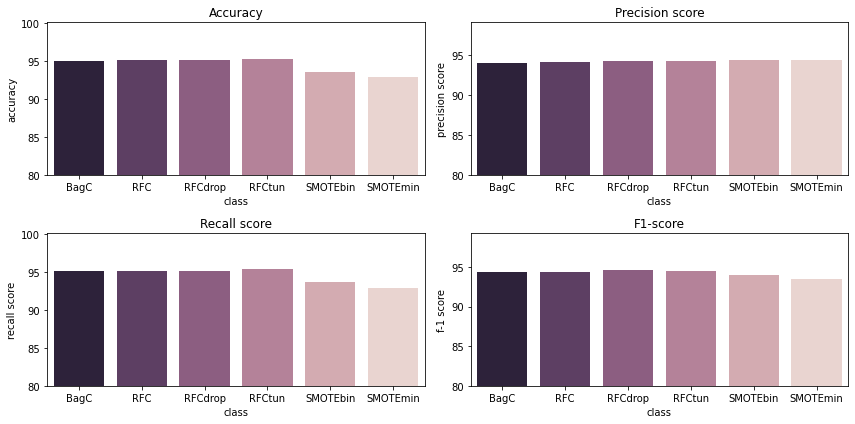

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12,6))

g=sns.barplot(ax=axs[0,0], x="class", y="accuracy", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[0,0].set_title("Accuracy")
g1=sns.barplot(ax=axs[0,1], x="class", y="precision score", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[0,1].set_title('Precision score')
g2=sns.barplot(ax=axs[1,0], x="class", y="recall score", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[1,0].set_title('Recall score')
g3=sns.barplot(ax=axs[1,1], x="class", y="f-1 score", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[1,1].set_title('F1-score')
g.set(ylim=(80, None))
g1.set(ylim=(80, None))
g2.set(ylim=(80, None))
g3.set(ylim=(80, None))
plt.tight_layout()

### Conclusion
All of the team members participated in the project. We started with the preprocessing, as a result we got rid of highly correlated columns and unnecessary id column. Then we made min-max scaling and started with the fitting of the model by the bagging classifier. Then we have shown not important columns by using random forest classifier. Since out dataset is imbalanced we implemented random forest with smote to artifically increase the number of rows in our dataset. However, this method of oversampling is not reliable. 

To sum up, according to graph, the model with the best performance is the random forest classifier with hyperparameters.